# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import scipy.stats as stats

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))

#I ran this file on Google CoLab, so on my end I can see the file I chose to import.

## Data Overview

- Observations
- Sanity checks

In [ ]:
#Checking the first 5 rows of the data set.

df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
#Checking the shape of the data set.

print("There are", df.shape[0], "rows and", df.shape[1], "columns in the data set.")

There are 3454 rows and 15 columns in the data set.


In [ ]:
#Checking to see the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
#Checking the statistcial summary of the numerical columns in the data set.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


12 of the 15 columns are float/int data types.

In [ ]:
#Checking for duplicate values.

df.duplicated().sum()

0

There are no duplicate values.

In [ ]:
#Checking for missing values.

df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

* "main_camera_mp" has 179 missing values
* "selfie_camera_mp" has 2 missing values
* "int_memory" had 4 missing values
* "ram" has 4 missing values
* "battery" has 6 missing values
* "weight" has 7 missing values

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

1. "brand_name"

In [ ]:
#Check how many different brand names are available in ReCell.

print("There are", df["brand_name"].nunique(), "manufacturing brands found in ReCell.")

There are 34 manufacturing brands found in ReCell.


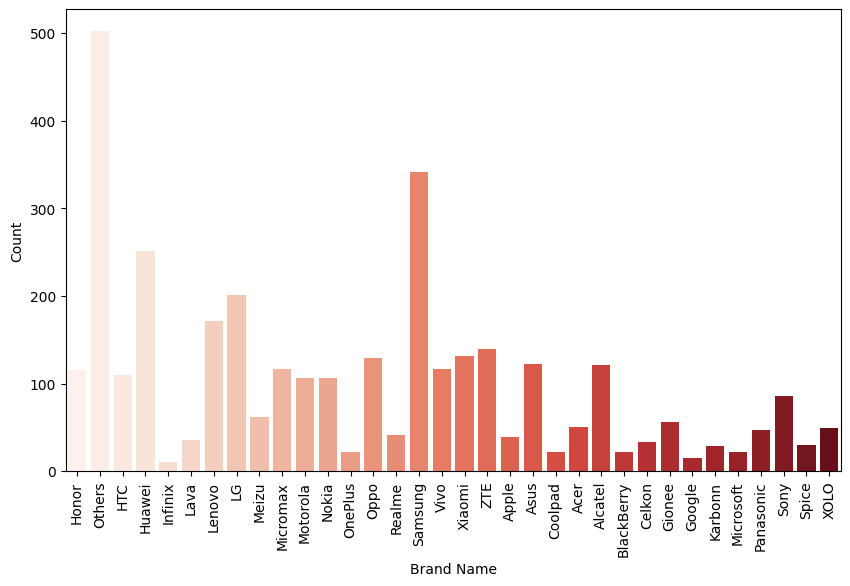

In [ ]:
#Create a countplot to see how many devices are under each brand name.

plt.figure(figsize = (10, 6))
sns.countplot(data = df, x = "brand_name", palette = "Reds")
plt.xticks(rotation = 90)
plt.xlabel("Brand Name")
plt.ylabel("Count")
plt.show()

Samsung has the most devices on ReCell, followed by Huawei, and LG. Collectively, however, "Other" (brands not matching the other 33) has the most devices.

2. "os"

In [ ]:
#Count the number of devices with a specific operating system.

df["os"].value_counts()

Android    3214
Others      137
Windows      67
iOS          36
Name: os, dtype: int64

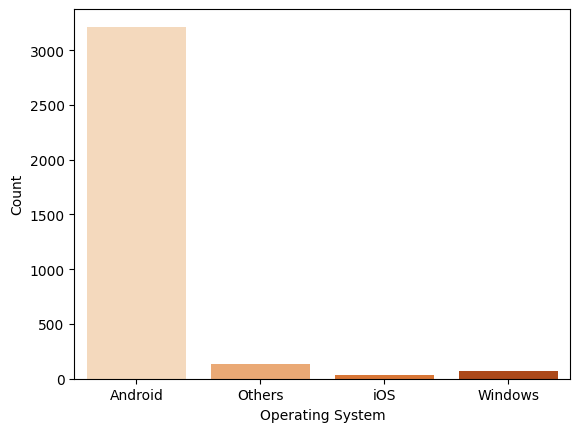

In [ ]:
#Create a countplot to visualize the number of devices with a specific operating system.

sns.countplot(data = df, x = "os", palette = "Oranges")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.show()

The Android OS dominates the devices found on ReCell.

3. "screen_size"

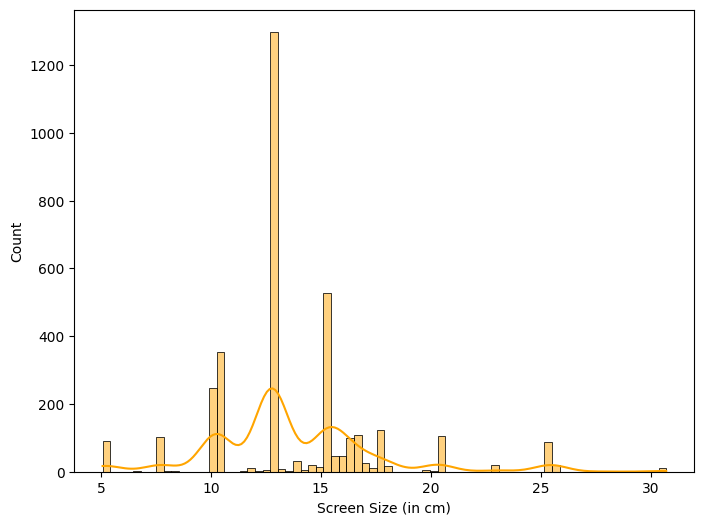

In [ ]:
#Create a histogram to visualize the distribution of screen size measurements.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "screen_size", kde = True, color = "orange")
plt.xlabel("Screen Size (in cm)")
plt.show()

The majority of devices have a screen size of about 13.5 cm. Screen size is not normally distributed (the data has 3 peaks and is right-skewed).

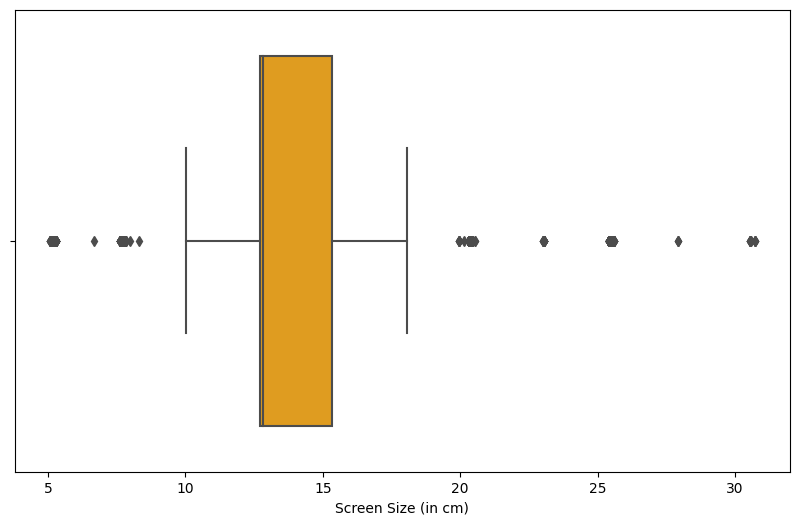

In [ ]:
#Create a boxplot to visualize the distribution of screen size measurements.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "screen_size", color = "orange")
plt.xlabel("Screen Size (in cm)")
plt.show()

There are many outliers (both small and large) in the data. The distribution highly right-skewed.

4. "4g"

In [ ]:
#Count how many of the devices have 4G available.

df["4g"].value_counts()

yes    2335
no     1119
Name: 4g, dtype: int64

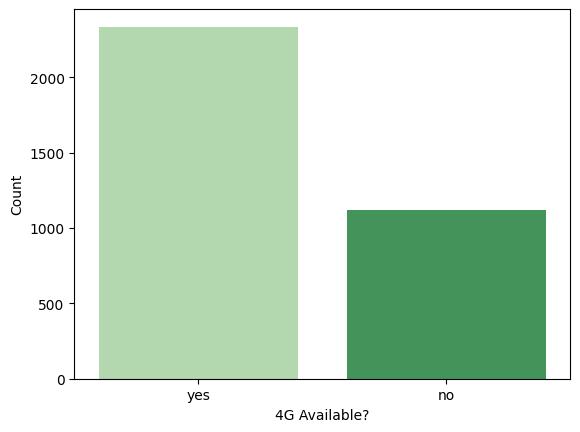

In [ ]:
#Create a countplot to visualize if devices do or don't have 4G available.

sns.countplot(data = df, x = "4g", palette = "Greens")
plt.xlabel("4G Available?")
plt.ylabel("Count")
plt.show()

More than two thirds of the ReCell devices in the data set have 4G; more do have it as opposed to not.

5. "5g"

In [ ]:
#Count how many of the devices have 5G available.

df["5g"].value_counts()

no     3302
yes     152
Name: 5g, dtype: int64

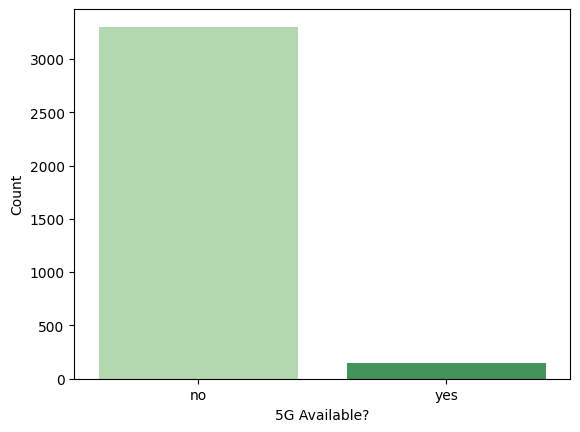

In [ ]:
#Create a countplot to visualize if devices do or don't have 5G available.

sns.countplot(data = df, x = "5g", palette = "Greens")
plt.xlabel("5G Available?")
plt.ylabel("Count")
plt.show()

Only a few devices on ReCell have 5G (the vast majority do not).


6. "main_camera_mp"

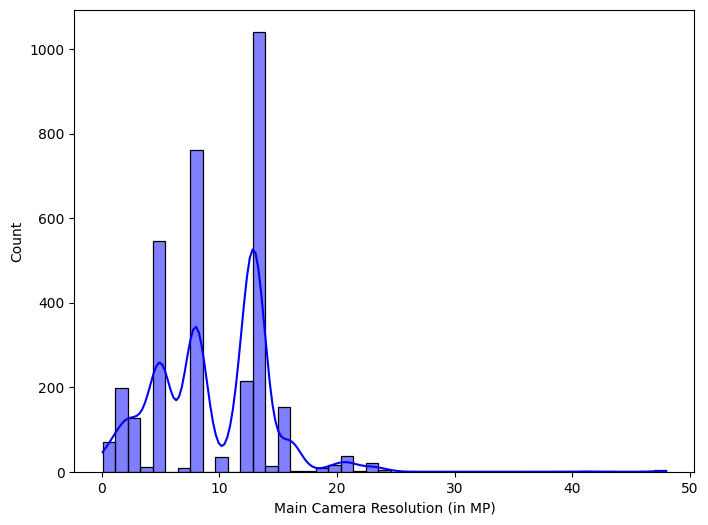

In [ ]:
#Create a histogram to visualize the distribution of main camera resolution for the devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "main_camera_mp", kde = True, color = "blue")
plt.xlabel("Main Camera Resolution (in MP)")
plt.show()

The data is not normal, as it has 3 peaks and is highly right-skewed. The majority of devices have a main camera resolution of about 13 megapixels.

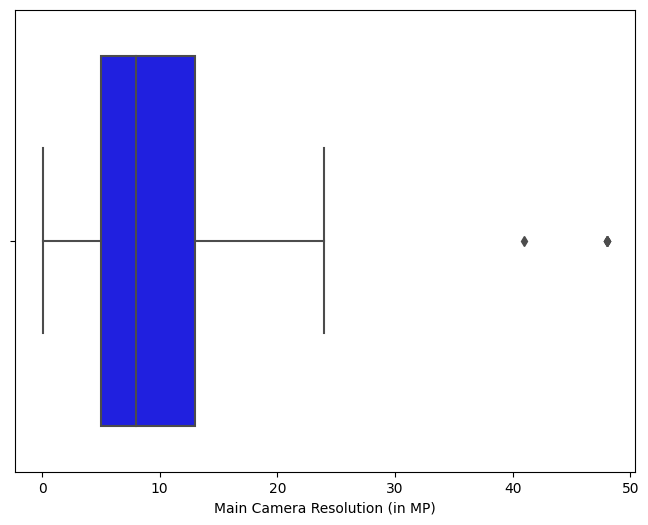

In [ ]:
#Create a boxplot to visualize the distribution of main camera resolution for the devices.

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "main_camera_mp", color = "blue")
plt.xlabel("Main Camera Resolution (in MP)")
plt.show()

There are 2 outliers with unusually high camera resolutions. The data is right-skewed but appears more normal in this format.

7. "selfie_camera_mp"

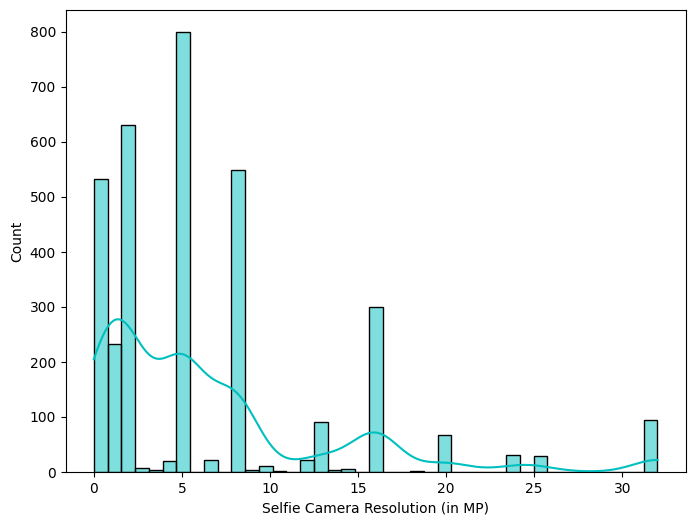

In [ ]:
#Create a histogram to visualize the distribution of selfie camera resolution for the devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "selfie_camera_mp", kde = True, color = "c")
plt.xlabel("Selfie Camera Resolution (in MP)")
plt.show()

The data is not normal at all; there is no bell curve nor thin tails. The majority of the devices have selfie cameras with 5 MPs, followed by ~2.5 MPs.

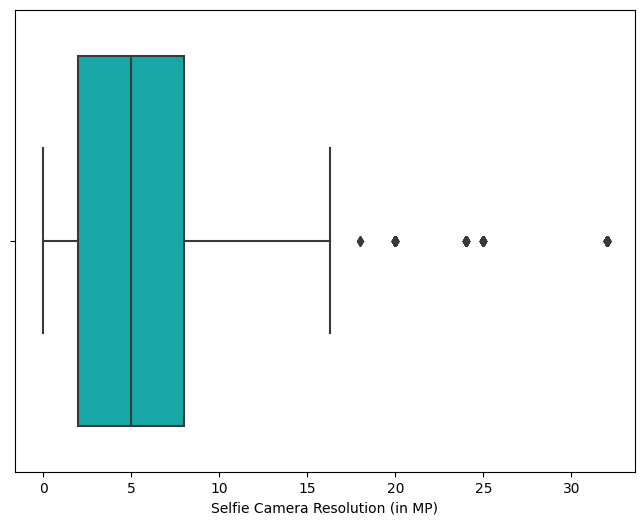

In [ ]:
#Create a boxplot to visualize the distribution of selfie camera resolution for the devices.

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "selfie_camera_mp", color = "c")
plt.xlabel("Selfie Camera Resolution (in MP)")
plt.show()

There are a handful of devices with unusually high megapixel resolution selfie cameras, and the rest of the data appears right-skewed.

8. "int_memory"

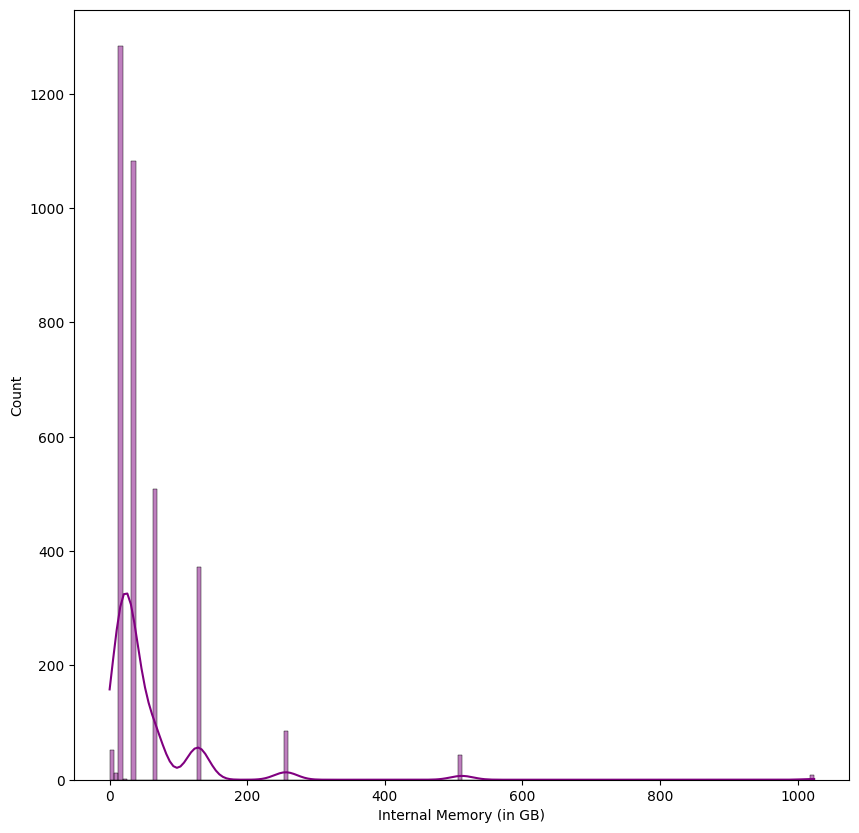

In [ ]:
#Create a histogram to visualize the distribution of internal memory available in the devices.

plt.figure(figsize = (10, 10))
sns.histplot(data = df, x = "int_memory", kde = True, color = "purple")
plt.xlabel("Internal Memory (in GB)")
plt.show()

The data is HIGHLY right-skewed. The majority of devices have around 50 GB of ROM.

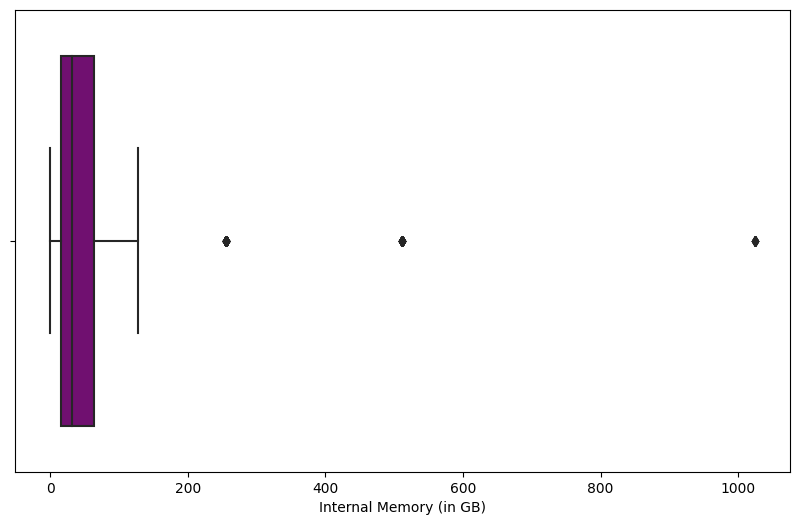

In [ ]:
#Create a boxplot to visualize the distribution of internal memory available in the devices.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "int_memory", color = "purple")
plt.xlabel("Internal Memory (in GB)")
plt.show()

There are 3 extreme outliers in the data set, but the rest of the data appears more normal, right-skewed.

9. "ram"

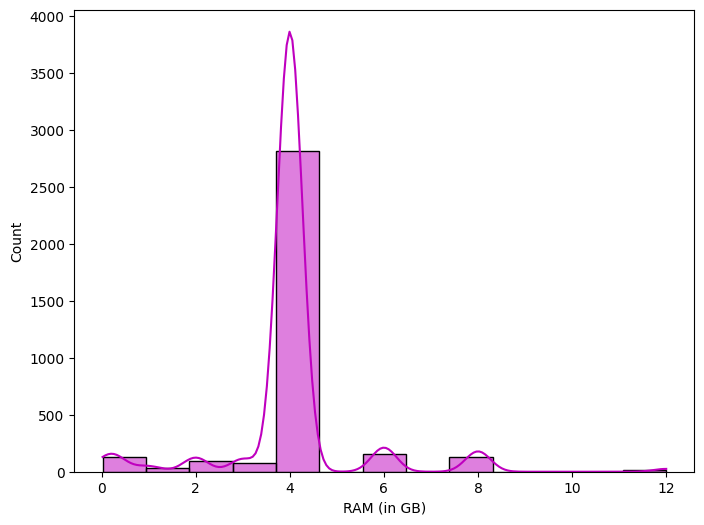

In [ ]:
#Create a histogram to visualize the distribution of random access memory available in the devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "ram", kde = True, color = "m")
plt.xlabel("RAM (in GB)")
plt.show()

The data has a large peak; the vast majority of devices have 4 GB of RAM. The data has long tails on both the left and right, but is more right-skewed.

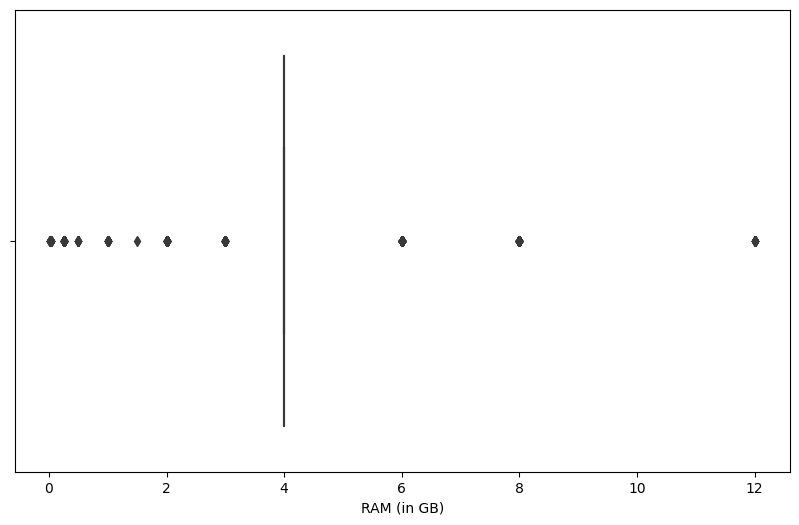

In [ ]:
#Create a boxplot to visualize the distribution of random access memory available in the devices.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "ram", color = "m")
plt.xlabel("RAM (in GB)")
plt.show()

Essentially, almost all the devices have 4 GB of RAM. There are multiple outliers less than and greater than 4 GB.

10. "battery"

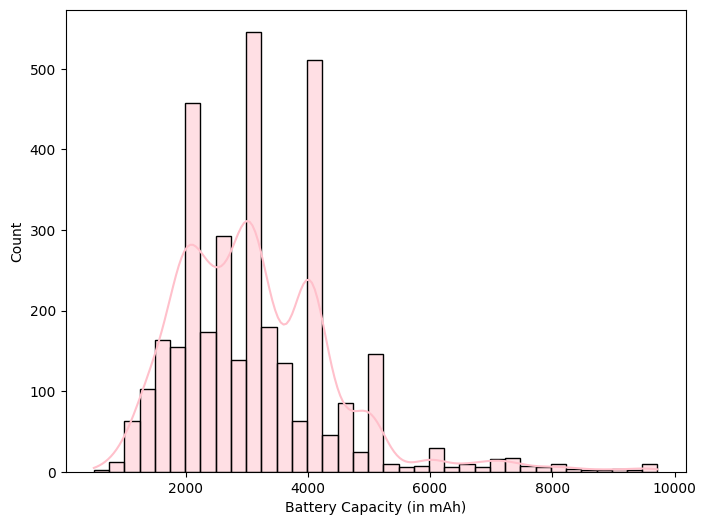

In [ ]:
#Create a histogram to visualize the battery capacity of the devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "battery", kde = True, color = "pink")
plt.xlabel("Battery Capacity (in mAh)")
plt.show()

The data has 3 peaks and is highly right-skewed. Most devices have ~3000 mAh of battery life, followed by ~4000 mAh, and ~2000 mAh.

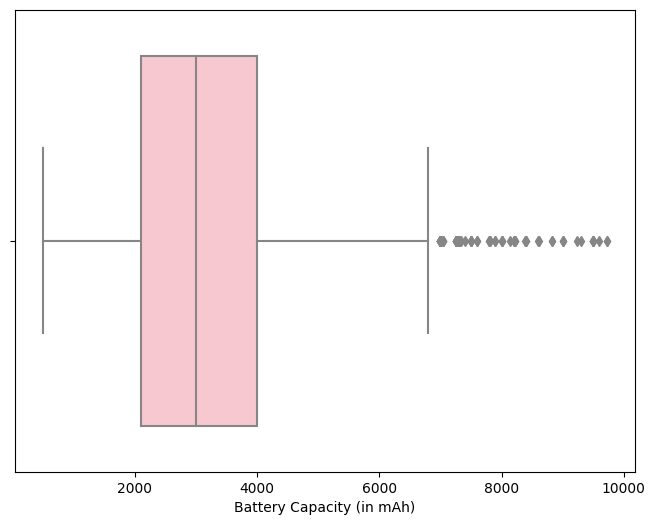

In [ ]:
#Create a boxplot to visualize the battery capacity of the devices.

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "battery", color = "pink")
plt.xlabel("Battery Capacity (in mAh)")
plt.show()

The data appears right-skewed, and has many outliers above the normal battery capacity range.

11. "weight"

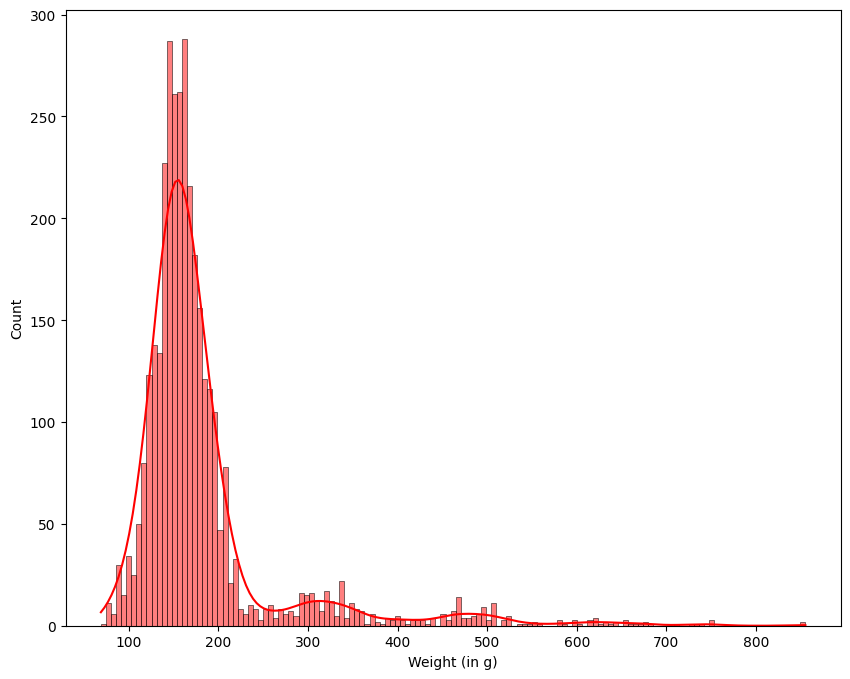

In [ ]:
#Create a histogram to visualize the weight of the devices.

plt.figure(figsize = (10, 8))
sns.histplot(data = df, x = "weight", kde = True, color = "red")
plt.xlabel("Weight (in g)")
plt.show()

There are many bins, meaning there is great variety among the weights of the devices. The data appears normal-ish (as it has a large bell curve), but right-skewed. The greatest number of devices weigh ~150 grams.

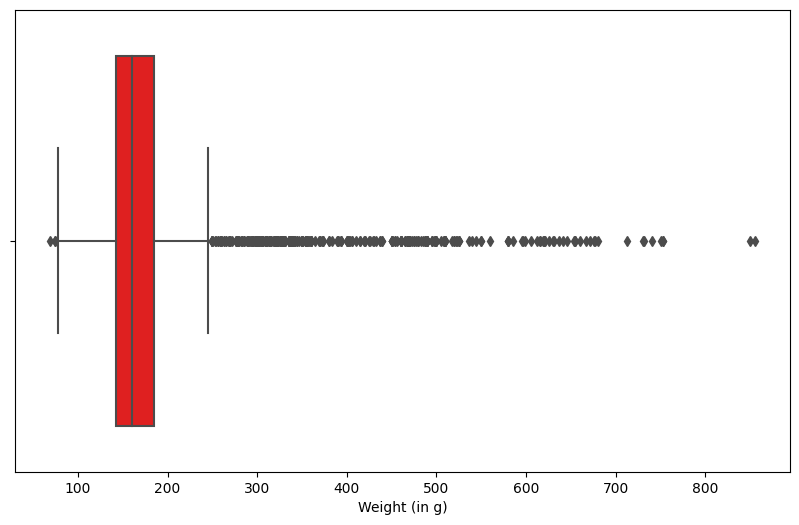

In [ ]:
#Create a boxplot to visualize the weight of the devices.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "weight", color = "red")
plt.xlabel("Weight (in g)")
plt.show()

The data appears normal within the quartiles, but has a few lower outliers and an exceedingly high number of upper outliers.

12. "release_year"

In [ ]:
#Check how many different release years are noted in ReCell.

print("There are", df["release_year"].nunique(), "different release years for the devices in ReCell.")

There are 8 different release years for the devices in ReCell.


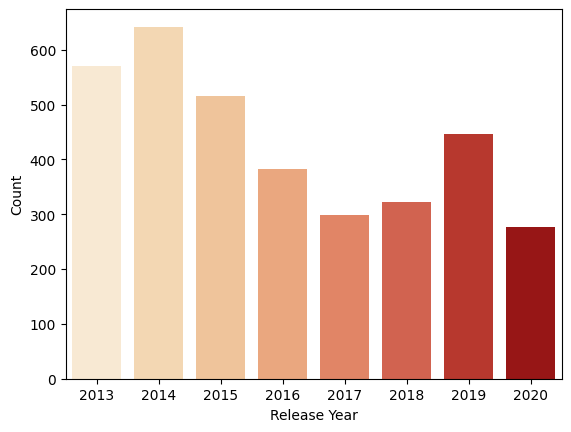

In [ ]:
#Create a countplot to see how many devices are under each release year.

sns.countplot(data = df, x = "release_year", palette = "OrRd")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

More devices from earlier years can be found in ReCell, with most devices being from 2014.

13. "days_used"

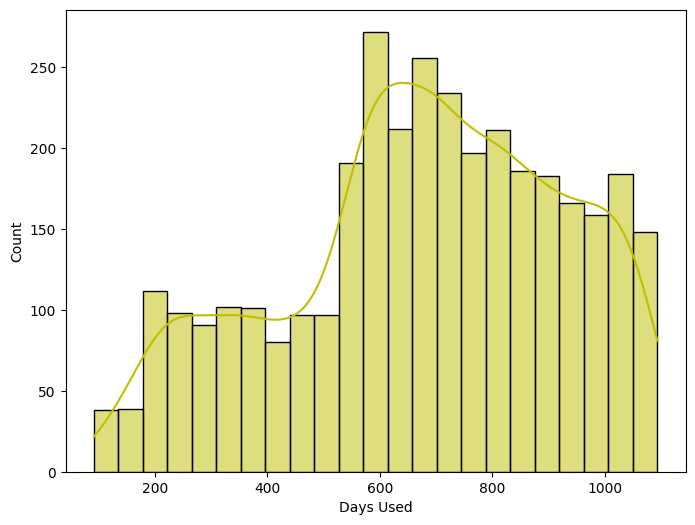

In [ ]:
#Create a histogram to visualize how many days the devices were used.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "days_used", kde = True, color = "y")
plt.xlabel("Days Used")
plt.show()

The data is not normally distributed. Most devices were used many days (between 600-800), which makes sense for a recycled device site.

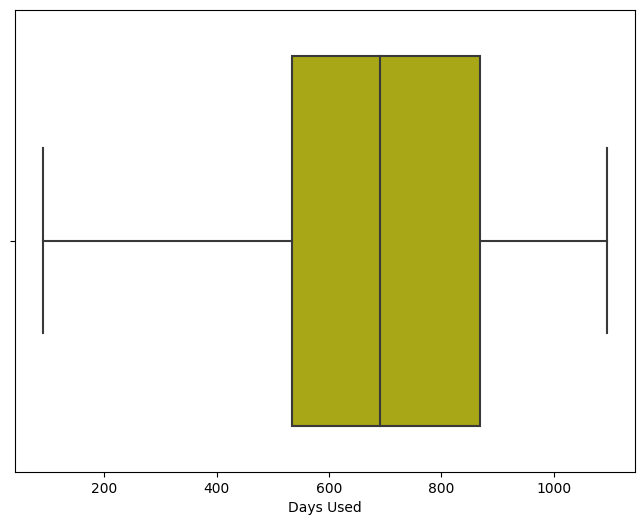

In [ ]:
#Create a boxplot to visualize how many days the devices were used.

plt.figure(figsize = (8, 6))
sns.boxplot(data = df, x = "days_used", color = "y")
plt.xlabel("Days Used")
plt.show()

There are no outliers for how many days the devices were used! The data is slightly left-skewed.

14. "normalized_new_price"

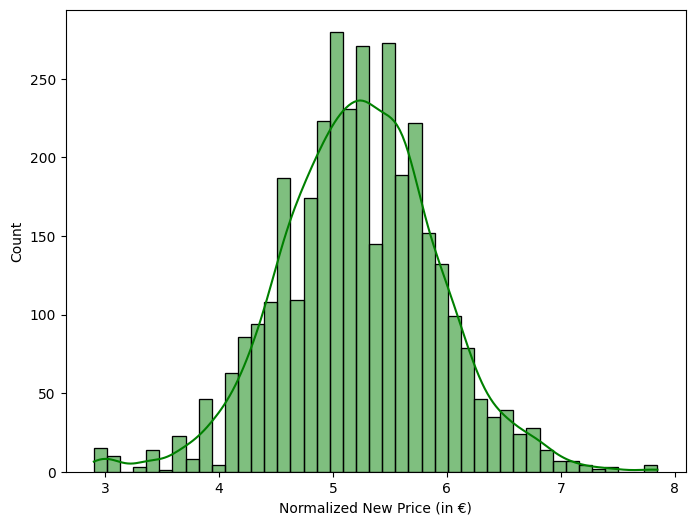

In [ ]:
#Create a histogram to visualize the distribution of the normalized price of new devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "normalized_new_price", kde = True, color = "green")
plt.xlabel("Normalized New Price (in €)")
plt.show()

The data is normally distributed; it has a large bell curve and thin tails.

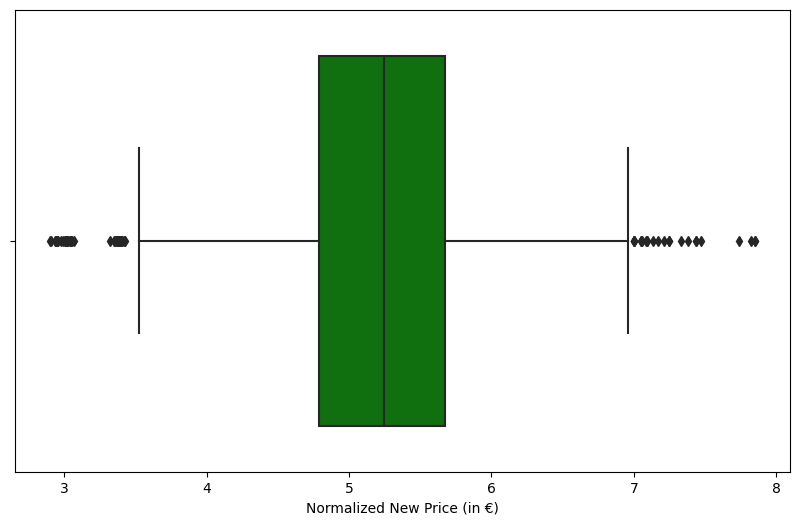

In [ ]:
#Create a boxplot to visualize the distribution of the normalized price of new devices.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "normalized_new_price", color = "green")
plt.xlabel("Normalized New Price (in €)")
plt.show()

As expected, the data within the quartiles appears normal. However, there are outliers present on both the upper and lower values of the data.

15. "normalized_used_price"

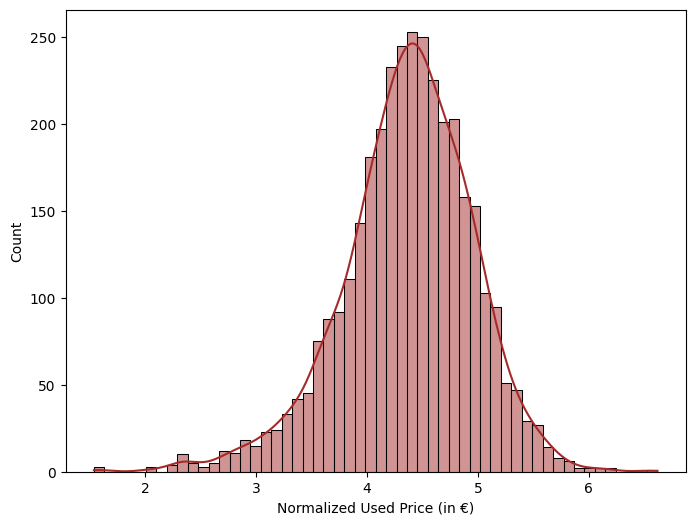

In [ ]:
#Create a histogram to visualize the distribution of the normalized price of used devices.

plt.figure(figsize = (8, 6))
sns.histplot(data = df, x = "normalized_used_price", kde = True, color = "brown")
plt.xlabel("Normalized Used Price (in €)")
plt.show()

The data is normally distributed; it has a large bell curve and thin tails. However, it is slightly left-skewed.


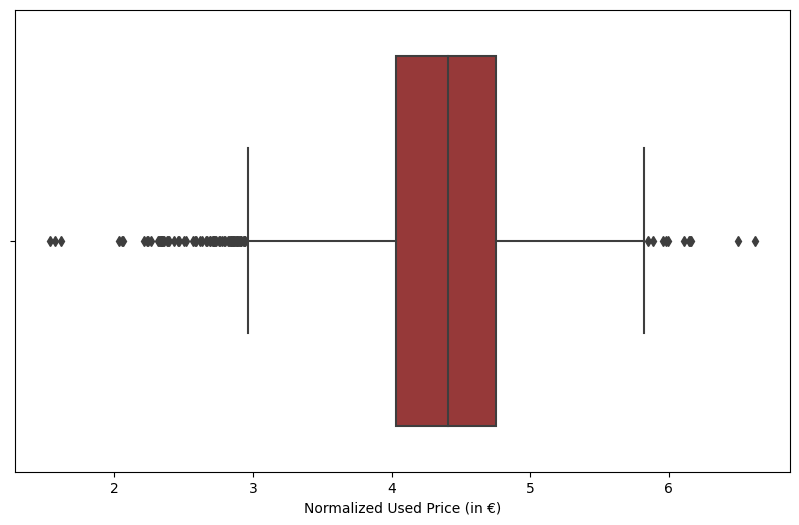

In [ ]:
#Create a boxplot to visualize the distribution of the normalized price of used devices.

plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "normalized_used_price", color = "brown")
plt.xlabel("Normalized Used Price (in €)")
plt.show()

As expected, the data within the quartiles appears normal. However, there are outliers present on both the upper and lower values of the data (more on the lower end, as the data is left-skewed).

### Bivariate Analysis

There are 15 variables, so running a bivariate analysis on every possible pair would take too long, and not all pairs may provide useful information. Thus, I will create a heatmap to see which variables have high correlations with others, as well as run bivariate analysis on additonal pairs I think would offer useful information for customers.

a. heatmap of numerical variables (minus "release_year")

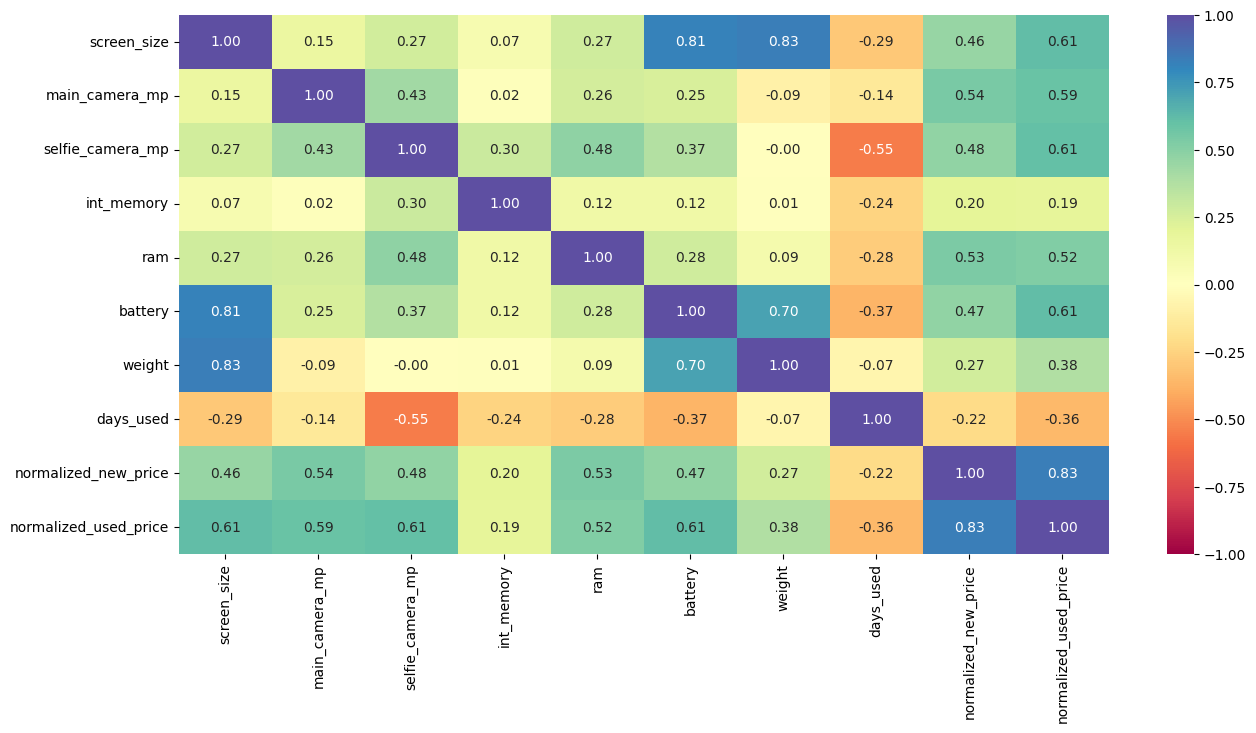

In [ ]:
#Creating a heatmap of the numerical columns to see if there are variable pairs with strong correlations.

#Creating list of variables that will be used.
varsList = ["screen_size", "main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight", "days_used", "normalized_new_price", "normalized_used_price"]

#Creating the heatmap.
plt.figure(figsize = (15,7))
sns.heatmap(data = df[varsList].corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral")
plt.show()

Observations:
* As expected, norm. used price vs. norm. new price have a strong positive correlation, since the prices should be relatively directly proportional.

* Battery and weight have a decently strong positive correlation, since more powerful batteries are probably bigger, and thus, weigh more.

* Days used and selfie camera MPs have a decently strong negative correlation. The selfie cameras on smartphones are possibly used more frequently than the main cameras, and thus, suffer from more wear and tear (which reduces the resolution).

* Screen size has a strong positive correlation with both battery and weight, which makes sense; a bigger screen makes a bigger device, which weighs more. Additionally, a bigger screen requires a more powerful battery to function.

* Battery has a moderate negative correlation with days used, which makes sense. The more someone uses a device, the less efficient (and weaker) the battery becomes.

b. "brand_name" vs. "ram"

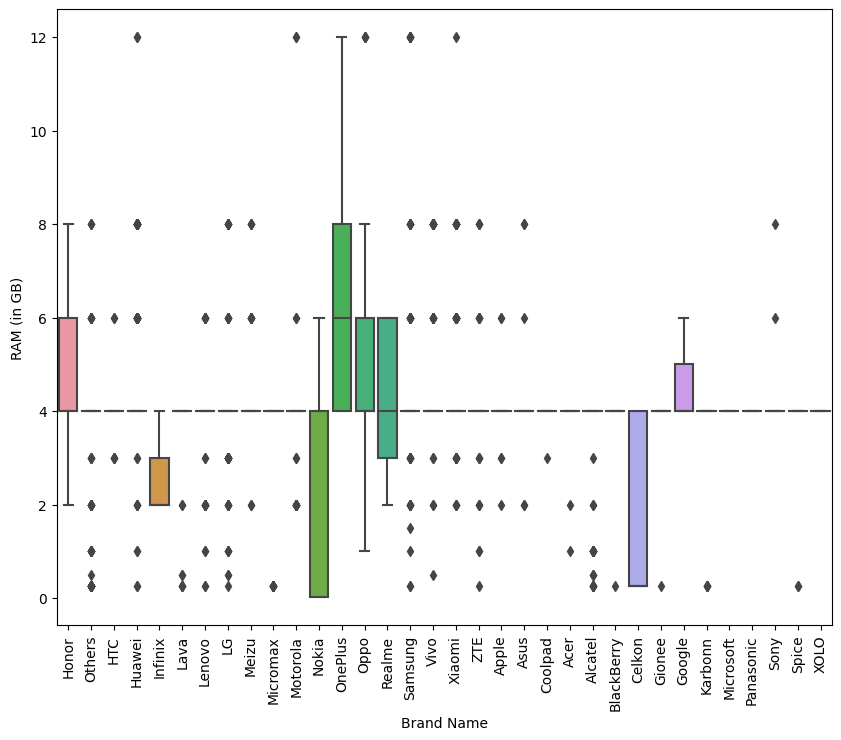

In [ ]:
#Creating boxplots for all device brands and their respective RAM GBs distributions.

plt.figure(figsize = (10, 8))
sns.boxplot(data = df, y = "ram", x = "brand_name")
plt.xticks(rotation = 90)
plt.xlabel("Brand Name")
plt.ylabel("RAM (in GB)")
plt.show()

The majority of brands manufacture most of their devices with 4GB of RAM (with a few exceptions (outliers) for almost every brand). However, a few brands have more devices below 4GB (Huawei, Nokia, and Celkon), and a few other have more of their devices above 4GB (Honor, OnePlus, Oppo, Samsung, and Google).

c. "battery" vs. "weight"

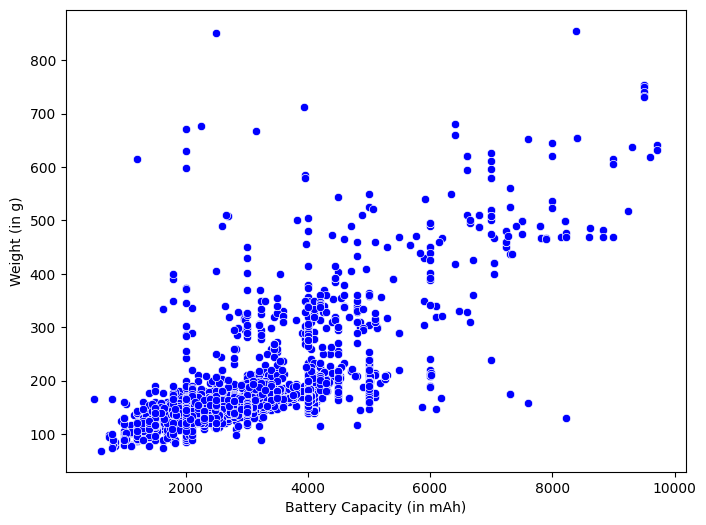

In [ ]:
#Creating a scatterplot to visualize the correlation between battery capacity and device weight.

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "battery", y = "weight", color = "blue")
plt.xlabel("Battery Capacity (in mAh)")
plt.ylabel("Weight (in g)")
plt.show()

As seen in the heatmap, the two variables appear to have a positive correlation. Perhaps more powerful batteries tend to bigger, and thus, weigh more (but we cannot assume this is the cause).

d. "release_year" vs. "normalized_used_price"

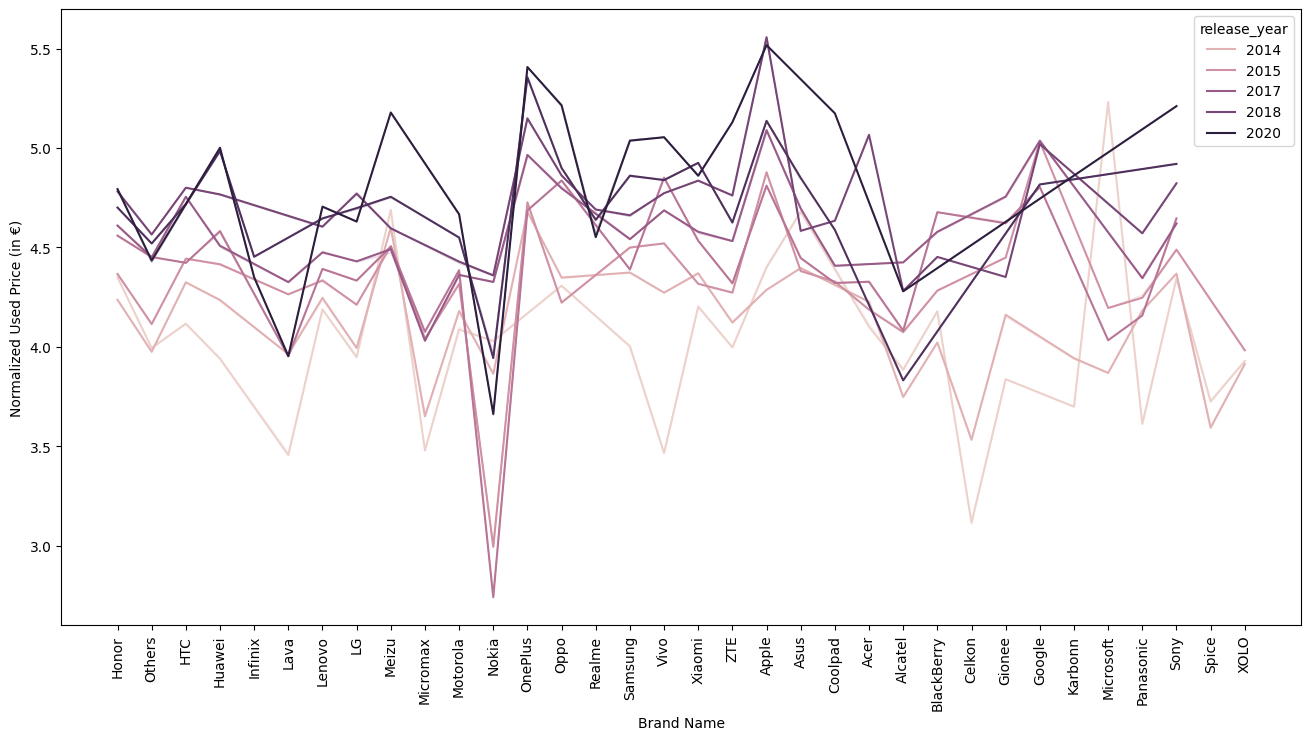

In [ ]:
#Creating a line plot to see the price changes of each brand based on the release year of the device.

plt.figure(figsize = (16,8))
sns.lineplot(data = df, x = "brand_name", y = "normalized_used_price", hue = "release_year", ci = False)
plt.xticks(rotation = 90)
plt.xlabel("Brand Name")
plt.ylabel("Normalized Used Price (in €)")
plt.show()

***NOTE***: If I plot the x-axis as "release_year" and the hue as "brand_name", the graph becomes unintelligible and jumbled. Maybe I am not seeing something in the code, but this is the only way for the graph to be legible, given how many brands there are. This graph should be read vertically instead of horizontally.

e. "days_used" vs. "normalized_used_price"

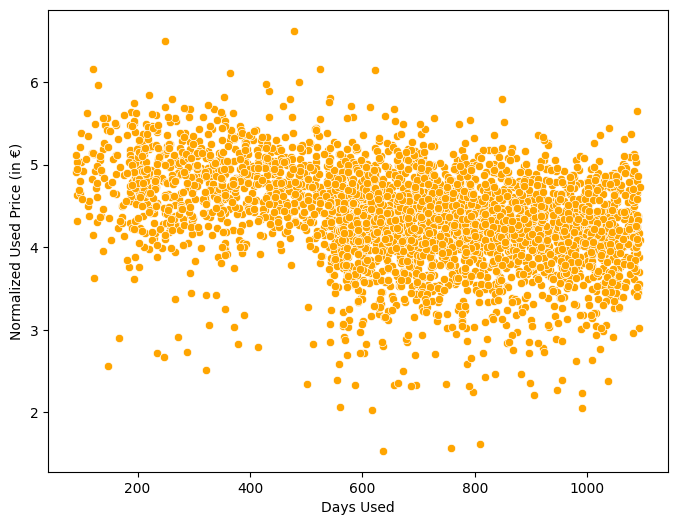

In [ ]:
#Creating a scatterplot to see if there is a strong correlation between the number of days used and the normalized price of the used device.

plt.figure(figsize = (8, 6))
sns.scatterplot(data = df, x = "days_used", y = "normalized_used_price", color = "orange")
plt.xlabel("Days Used")
plt.ylabel("Normalized Used Price (in €)")
plt.show()

It's hard to tell just from visualizing the data, but it appears that using a device for more days slightly correlates with a lower price for the used device (corroborated by the heatmap). However, we cannot assume causation to be true.

f. "*A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?*"

In [ ]:
#Filtering the dataframe to only show batteries with over 4500 mAh in capacity.

largeBattery = df[df["battery"] > 4500]
print("There are" , largeBattery.shape[0], "devices with batteries of over 4500 mAh.")

There are 341 devices with batteries of over 4500 mAh.


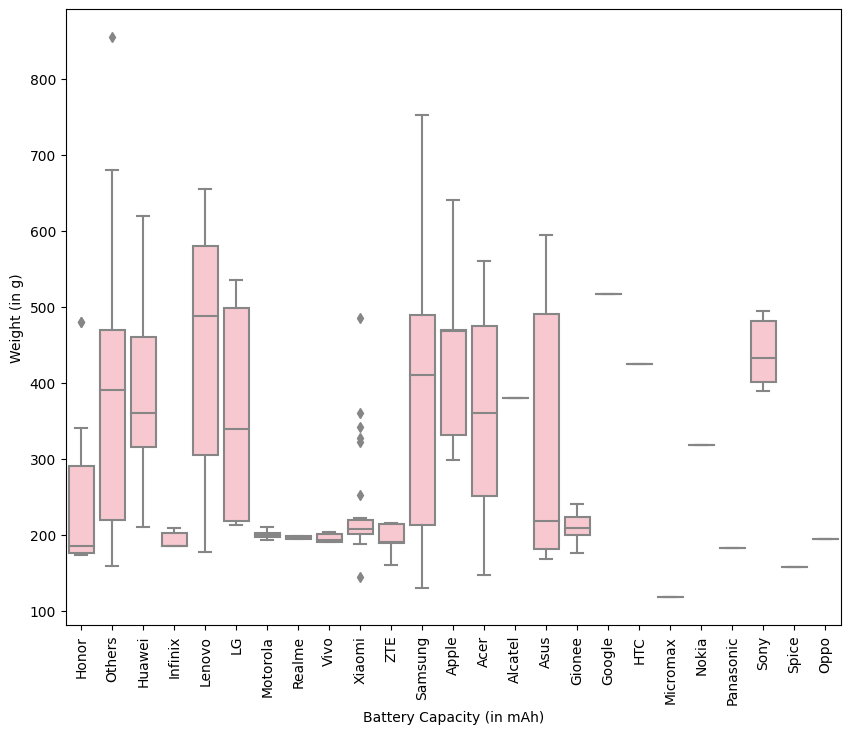

In [ ]:
#Plotting the filtered data.

plt.figure(figsize = (10, 8))
sns.boxplot(data = largeBattery, x = "brand_name", y = "weight", color = "pink")
plt.xticks(rotation = 90)
plt.xlabel("Battery Capacity (in mAh)")
plt.ylabel("Weight (in g)")
plt.show()

The weight of devices with battery capacities over 4500 mAh tends to stay under 500g, through some brands exceed that frequently.

g. "*Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?*"

In [ ]:
#Filtering the dataframe to only show screens bigger than 15.24 cm (6 inches converts to 15.24 cm, which is considered a large screen for a standard smartphone).

largeScreen = df[df["screen_size"] > 15.24]
print("There are" , largeScreen.shape[0], "devices with large screens.")

There are 1099 devices with large screens.


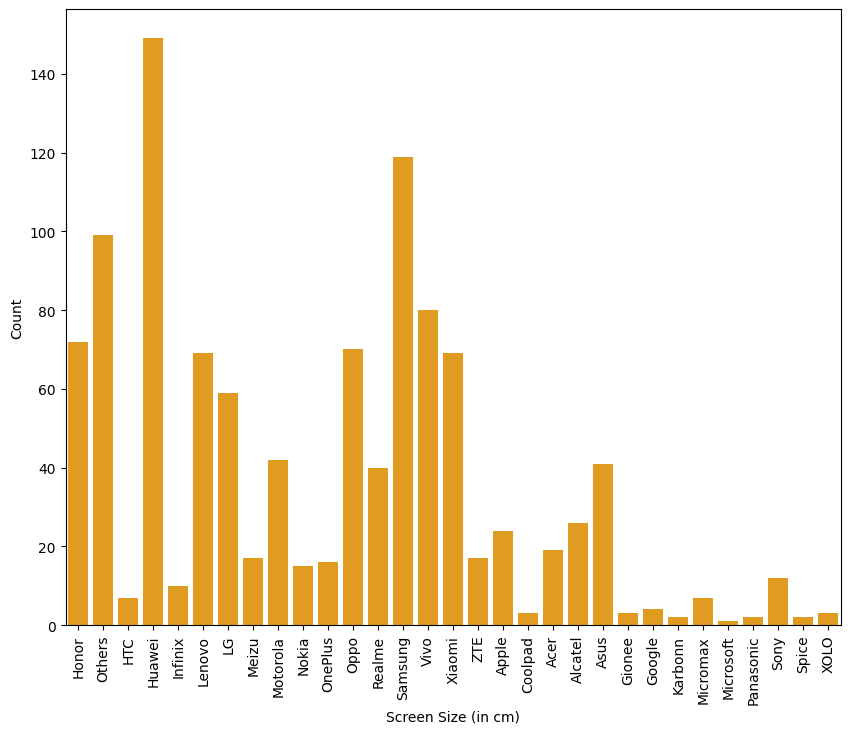

In [ ]:
#Plotting the filtered data.

plt.figure(figsize = (10, 8))
sns.countplot(data = largeScreen, x = "brand_name", color = "orange")
plt.xlabel("Screen Size (in cm)")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

Huawei, Samsung, and a collection of other non-listed brands offer the devices with largest screens.

h. "*A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands."*

In [ ]:
#Filtering the dataframe to only show devices with front-facing camera resolution of over 8 MP.

goodSelfieCam = df[df["selfie_camera_mp"] > 8]
print("There are", goodSelfieCam.shape[0], "devices with high selfie camera resolution.")

There are 655 devices with high selfie camera resolution.


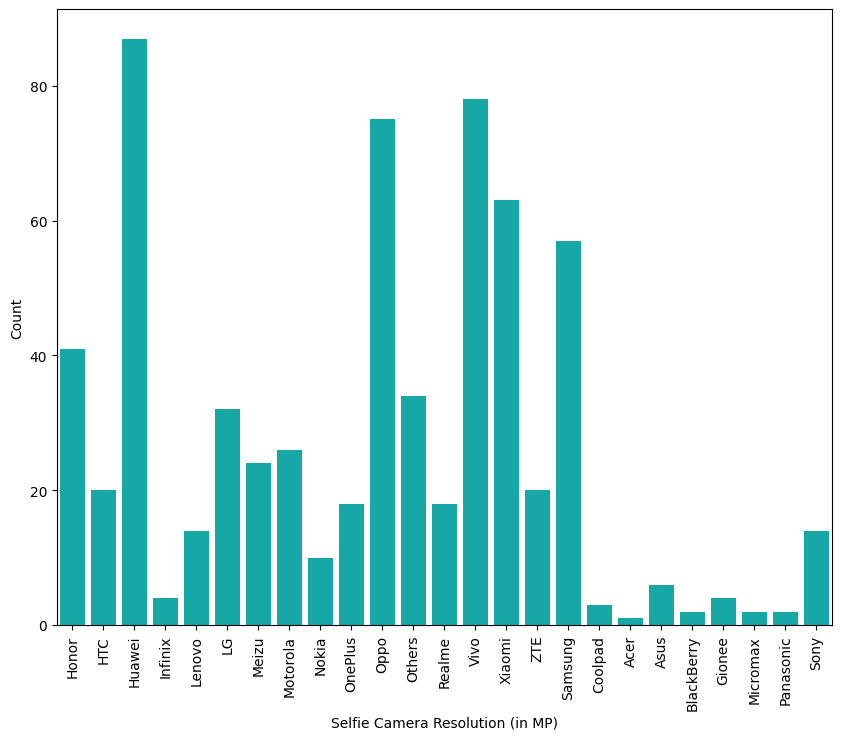

In [ ]:
#Plotting the filtered data.

plt.figure(figsize = (10, 8))
sns.countplot(data = goodSelfieCam, x = "brand_name", color = "c")
plt.xlabel("Selfie Camera Resolution (in MP)")
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.show()

Huawei, Oppo, Vivo, Xiaomi, and Samsung offer devices with high-resolution selfie cameras much more than other brands.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [ ]:
#Making a copy of the original data frame to avoid changing it permanently.

df1 = df.copy()

We can see from the overview that 6 numerical columns contain missing values. Thus, we will fill in the values with their respective medians (since the presence of outliers can severaly affect the mean).

We can create a *for* loop that iterates through each column and uses the median values (sorted by brand and year, to be more specific) to fill in the missing values.

In [ ]:
#Creating a list containing the 6 rows with missing values.
missingValCols = ["main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight"]

#"For every column in the list I created..."
for col in missingValCols:
    #...find the median value of each column, sorted by release year and brand name, and use it to replace any 'NaN' values in the column.
    df1[col] = df1[col].fillna(
        value = df1.groupby(["release_year", "brand_name"])[col].transform("median")
    )

#Check for missing values in the dataframe.
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

It looks like only "int_memory" and "ram" were filled in. Given the large number of brands available (some not very known), it's probable that not every brand had a device from each year. The process can be repeated, except the data is only grouped by brand.

In [ ]:
#Creating a list containing the 6 rows with missing values.
missingValCols2 = ["main_camera_mp", "selfie_camera_mp", "battery", "weight"]

#"For every column in the list I created..."
for col in missingValCols:
    #...find the median value of each column, sorted only by brand name, and use it to replace any 'NaN' values in the column.
    df1[col] = df1[col].fillna(
        value = df1.groupby(["brand_name"])[col].transform("median")
    )

#Check for missing values in the dataframe.
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

All missing values except 10 in "main_camera_mp" were filled in. It's probable that all devices missing camera data come from the same brand. In this case, we can just fill in the remaining missing values with the median value from the entire column.

In [ ]:
#Fill remaining values with "main_camera_mp" median value.
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

#Check for missing values in the dataframe.
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

All missing values have been imputed.

### Outlier Detection


We can visualize all the outliers in the data with a for loop, and then decide if it is best to treat them or leave them as they are.

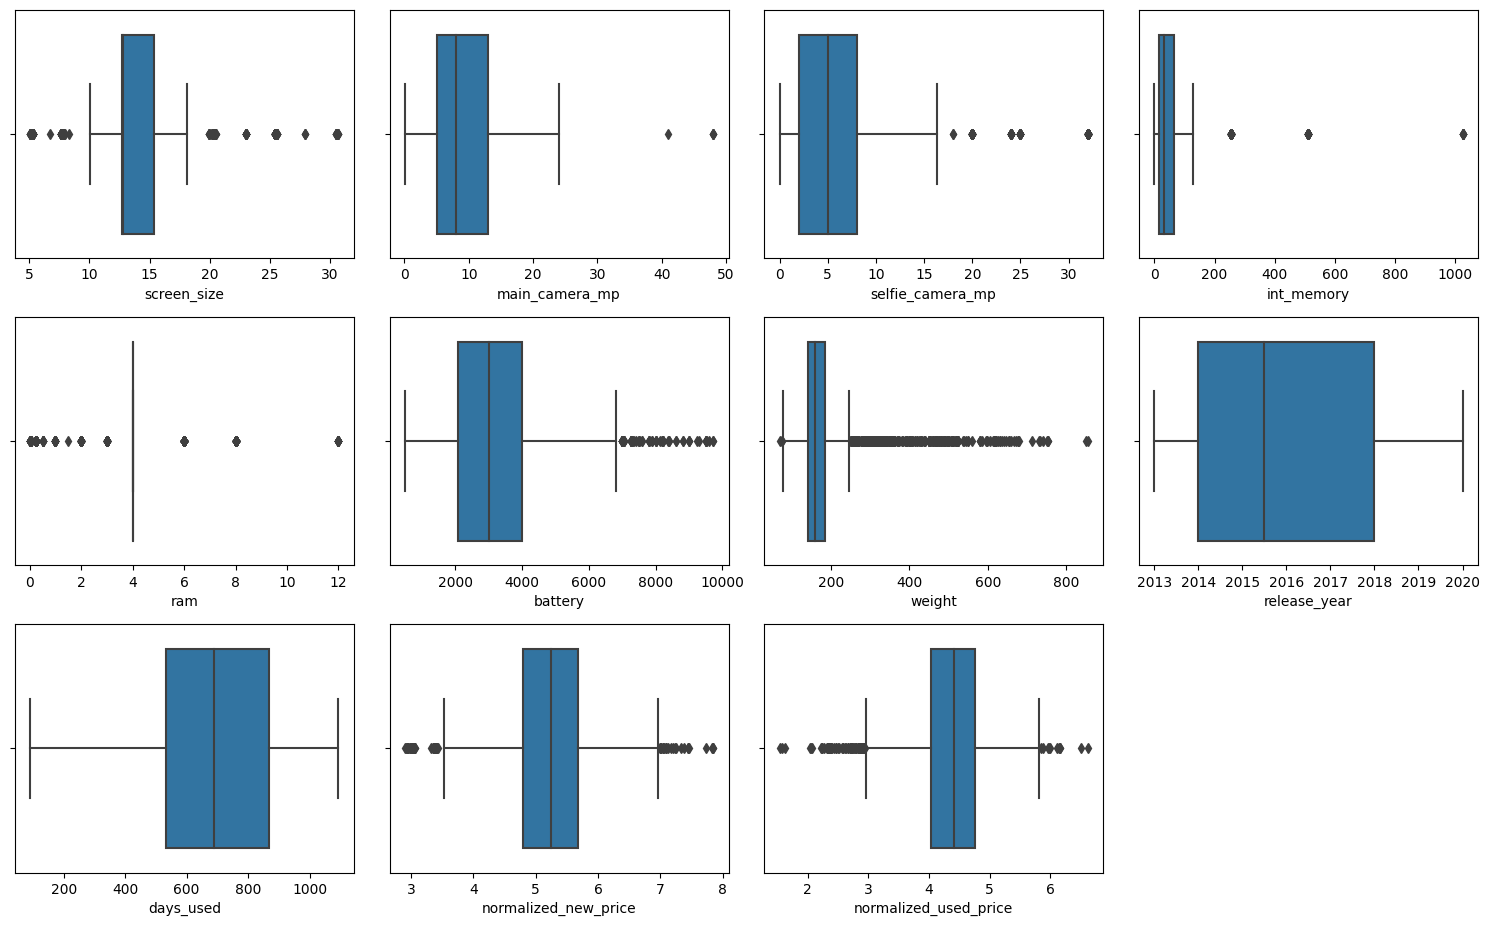

In [ ]:
#Make a list with all the non-categorical columns.
numCols = ["screen_size", "main_camera_mp", "selfie_camera_mp", "int_memory", "ram", "battery", "weight", "release_year", "days_used", "normalized_new_price", "normalized_used_price"]

plt.figure(figsize = (15, 12))

#Make a for loop that graphs each column in a grid.
for i, variable in enumerate(numCols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data = df1, x = variable)
    plt.tight_layout()

plt.show()

Every column listed, except for "days_used" and "release_year", has outliers, some having a large amount.


After a bit of research, I believe that even some of the most extreme outlier values are possible given that ReCell sells used phones *and* tablets. Some devices have huge screens (tablets) or really small ones (old phones), can have up to 1TB of ROM, extremely good camera quality, etc. Therefore, I will leave the outliers untreated, as it seems the data could be legitimate.

### Preparing Data for Modeling

The data must be randomly split into training (70%) and testing (30%) sets. Dummy variables for categorical columns must also be created. I will first import the necessary libraries.

In [ ]:
#For randomized data splitting.
from sklearn.model_selection import train_test_split

#To build the linear regression model.
import statsmodels.api as sm

#To check model performance.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

When defining X and y, the 'target' variable is "normalized_used_price", so all other variables are factors.

In [ ]:
#Defining X (independent) and y (dependent) variables.

X = df1.drop("normalized_used_price", axis = 1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_new_price  
0        127              4.715100  
1        325              5.519018  
2        162              5.884631  
3        345              5.630961  
4  

In [ ]:
#Creating dummy variables for "brand_name", "os", "4g", and "5g".
X = pd.get_dummies(X, columns = ["brand_name", "os", "4g", "5g"], drop_first = True)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Adding the constant to the data set.
X = sm.add_constant(X)

In [ ]:
#Splitting the data set into 70:30 train/test sets.

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
print("Number of rows in train data =", xTrain.shape[0])
print("Number of rows in test data =", xTest.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [ ]:
#Creating the ordinary least squares regression model.
olsmodel = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:04   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations:

* The constant is -46.5, meaning that when all other factors are at 0, then the expected output would be -46.5.

* R² is 0.845, which means that the model explained 84.5% of the variation of the independent variables in the data (good!).

* The adjusted-R² is 0.842, which means the model is a good fit for the data.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

### 1. Multicollinearity

The data cannot have independent variables that predict each other, so we will test to make sure it is not the case using VIF (and treat it, if it is).


In [ ]:
#Importing the test.

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Using the test to check for the VIF of each column.

vifValues = pd.Series(
    [variance_inflation_factor(xTrain.values, i)
    for i in range (xTrain.shape[1])],
    index = xTrain.columns
)

In [ ]:
#Printing the new series containing the values.

print("VIF Values: \n\n{}\n".format(vifValues))

VIF Values: 

const                    3.791593e+06
screen_size              7.677290e+00
main_camera_mp           2.285051e+00
selfie_camera_mp         2.812473e+00
int_memory               1.364152e+00
ram                      2.282352e+00
battery                  4.081780e+00
weight                   6.396749e+00
release_year             4.899007e+00
days_used                2.660269e+00
normalized_new_price     3.119430e+00
brand_name_Alcatel       3.405693e+00
brand_name_Apple         1.305767e+01
brand_name_Asus          3.332038e+00
brand_name_BlackBerry    1.632378e+00
brand_name_Celkon        1.774721e+00
brand_name_Coolpad       1.468006e+00
brand_name_Gionee        1.951272e+00
brand_name_Google        1.321778e+00
brand_name_HTC           3.410361e+00
brand_name_Honor         3.340687e+00
brand_name_Huawei        5.983852e+00
brand_name_Infinix       1.283955e+00
brand_name_Karbonn       1.573702e+00
brand_name_LG            4.849832e+00
brand_name_Lava          1.711360e+0

Ignorning the dummy variables and the constant, any independent variables with VIF scores greater than 5 may be collinear with other variables. From the test, it looks like 2 variables have this problem:
* "screen_size"
* "weight"

We want to drop the variable with the greatest VIF score, but least effect on adjusted-R². We will check each one and then decide which to drop first.

i. "screen_size"

In [ ]:
xTrain1 = xTrain.drop(["screen_size"], axis=1)
olsmod1 = sm.OLS(yTrain, xTrain1)
olsres1 = olsmod1.fit()
print(
    "R²:",
    np.round(olsres1.rsquared, 3),
    "\nAdjusted-R²:",
    np.round(olsres1.rsquared_adj, 3),
)

R²: 0.842 
Adjusted-R²: 0.838


ii. "weight"

In [ ]:
xTrain2 = xTrain.drop(["weight"], axis=1)
olsmod2 = sm.OLS(yTrain, xTrain2)
olsres2 = olsmod2.fit()
print(
    "R²:",
    np.round(olsres2.rsquared, 3),
    "\nAdjusted-R²:",
    np.round(olsres2.rsquared_adj, 3),
)

R²: 0.841 
Adjusted-R²: 0.838


Both variables have the same effect on adjusted-R² (reduce it by 0.004), so I will drop "screen_size", since it has a greater VIF.

In [ ]:
#Dropping the "screen_size" column on the original training dataframe.

xTrain = xTrain.drop(["screen_size"], axis = 1)

In [ ]:
#Rerun the model without the collinear column.
olsmodel3 = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodel3.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:07   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Checkin for VIF >= 5 again.

vifValues = pd.Series(
    [variance_inflation_factor(xTrain.values, i)
    for i in range (xTrain.shape[1])],
    index = xTrain.columns
)

In [ ]:
#Printing the new values.

print("VIF Values: \n\n{}\n".format(vifValues))

VIF Values: 

const                    3.664323e+06
main_camera_mp           2.281835e+00
selfie_camera_mp         2.809009e+00
int_memory               1.362043e+00
ram                      2.282350e+00
battery                  3.842989e+00
weight                   2.993855e+00
release_year             4.730315e+00
days_used                2.648929e+00
normalized_new_price     3.077650e+00
brand_name_Alcatel       3.405533e+00
brand_name_Apple         1.300034e+01
brand_name_Asus          3.326698e+00
brand_name_BlackBerry    1.631042e+00
brand_name_Celkon        1.774528e+00
brand_name_Coolpad       1.467719e+00
brand_name_Gionee        1.941437e+00
brand_name_Google        1.319334e+00
brand_name_HTC           3.399980e+00
brand_name_Honor         3.340354e+00
brand_name_Huawei        5.981046e+00
brand_name_Infinix       1.283526e+00
brand_name_Karbonn       1.573494e+00
brand_name_LG            4.832548e+00
brand_name_Lava          1.711092e+00
brand_name_Lenovo        4.553789e+0

There is no longer multicollinearity among the independent variables.

### 1a. Dropping Insignificant Variables

Now, we can drop any variables with a p-value >= 0.05 (indicating that they are not significant predictor variables). We want to double-check they do not affect adjusted-R².

"battery"

In [ ]:
xTrain4 = xTrain.drop(["battery"], axis=1)
olsmod4 = sm.OLS(yTrain, xTrain4)
olsres4 = olsmod4.fit()
print(
    "R²:",
    np.round(olsres4.rsquared, 3),
    "\nAdjusted-R²:",
    np.round(olsres4.rsquared_adj, 3),
)

R²: 0.842 
Adjusted-R²: 0.838


"int_memory"

In [ ]:
xTrain5 = xTrain.drop(["int_memory"], axis=1)
olsmod5 = sm.OLS(yTrain, xTrain5)
olsres5 = olsmod5.fit()
print(
    "R²:",
    np.round(olsres5.rsquared, 3),
    "\nAdjusted-R²:",
    np.round(olsres5.rsquared_adj, 3),
)

R²: 0.841 
Adjusted-R²: 0.838


"days_used"

In [ ]:
xTrain6 = xTrain.drop(["days_used"], axis=1)
olsmod6 = sm.OLS(yTrain, xTrain6)
olsres6 = olsmod6.fit()
print(
    "R²:",
    np.round(olsres6.rsquared, 3),
    "\nAdjusted-R²:",
    np.round(olsres6.rsquared_adj, 3),
)

R²: 0.841 
Adjusted-R²: 0.838


Adjusted-R² is not affected by dropping any of these, so the one with the greatest p-value will be dropped first.

In [ ]:
#Dropping the "battery" column on the original training dataframe.

xTrain = xTrain.drop(["battery"], axis = 1)

In [ ]:
#Rerun the model without the insignificant predictor.
olsmodel7 = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodel7.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     273.5
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:08   Log-Likelihood:                 97.766
No. Observations:                   2417   AIC:                            -101.5
Df Residuals:                       2370   BIC:                             170.6
Df Model:                             46                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Repeat with the remaining insignificant predictor variables.

In [ ]:
#Dropping the "days_used" column on the original training dataframe.

xTrain = xTrain.drop(["days_used"], axis = 1)

In [ ]:
#Rerun the model without the insignificant predictor.
olsmodel8 = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodel8.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     279.6
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:08   Log-Likelihood:                 97.341
No. Observations:                   2417   AIC:                            -102.7
Df Residuals:                       2371   BIC:                             163.7
Df Model:                             45                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Dropping the "int_memory" column on the original training dataframe.

xTrain = xTrain.drop(["int_memory"], axis = 1)

In [ ]:
#Rerun the model without the insignificant predictor.
olsmodel9 = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodel9.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.8
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:08   Log-Likelihood:                 96.431
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2372   BIC:                             157.7
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


The insignificant predictor variables have been removed.

### 2. Linearity & Independence

We test for linearity and independence by plotting the fitted values vs. the residuals to make sure no discernible pattern exists. If there is such a pattern, we would need to transform some of the variables.

In [ ]:
#Creating a new empty dataframe.
dfPred = pd.DataFrame()

#Making a column of the actual values.
dfPred["Actual Values"] = yTrain

#Making a column of the predicted values.
dfPred["Fitted Values"] = olsmodel9.fittedvalues

#Making a column of the residuals.
dfPred["Residuals"] = olsmodel9.resid

dfPred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.889555,0.197933
1525,4.448399,4.643787,-0.195387
1128,4.315353,4.332147,-0.016794
3003,4.282068,4.216149,0.065919
2907,4.456438,4.467236,-0.010798


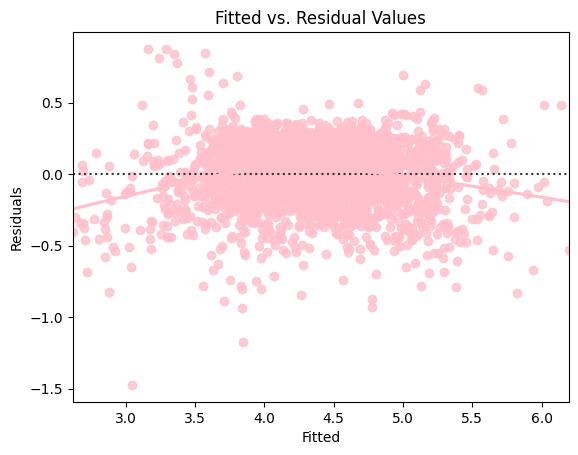

In [ ]:
#Plotting the fitted values vs. residuals.

sns.residplot(data = dfPred, x ="Fitted Values", y ="Residuals", color = "pink", lowess = True)
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Fitted vs. Residual Values")
plt.show()

There appears to be no discernible pattern to the data, so we will consider this assumption to be fulfilled.

### 3. Normality

We test for normality in the distribution of residuals by using a Q-Q comparison plot or the Shapiro-Wilks Test.

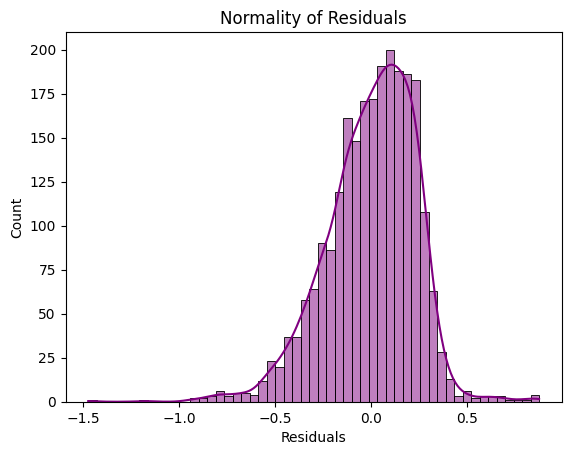

In [ ]:
#Plotting a histogram to visualize the distribution of residuals.

sns.histplot(data = dfPred, x = "Residuals", kde = True, color = "purple")
plt.title("Normality of Residuals")
plt.show()

The data appears left-skewed, but has a bell curve and flat tails. Let's check using a Q-Q Plot.

In [ ]:
#Importing the necessary libraries.

import pylab
import scipy.stats as stats

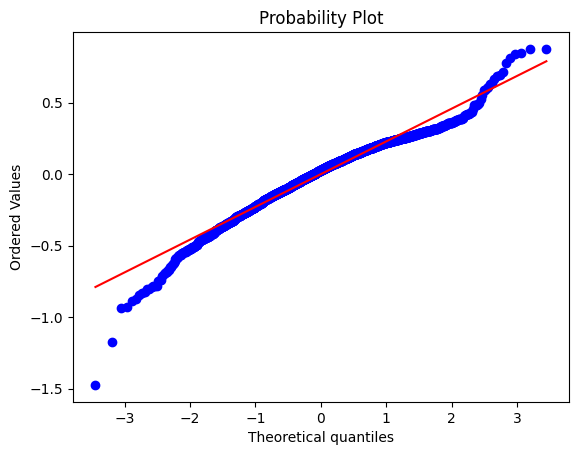

In [ ]:
#Creating the Q-Q Plot.

stats.probplot(dfPred["Residuals"], dist = "norm", plot = pylab)
plt.show()

The center of the data appears normal, but the tails are not. Let's do a Shapiro-Wilks Test.

In [ ]:
#Running the test.

stats, pValue = stats.shapiro(dfPred["Residuals"])

In [ ]:
#Checking if the p-value is greater or equal to 0.05.

pValue >= 0.05

False

Based on the three methods, it does not appear that the residuals are normaly distributed. However, we did note that almost every numerical column in the data set had outliers. Upon double-checking, all the remaining numerical columns (except for "release_year") have outliers, with particularly large amounts on the upper values side. Yet, outliers were chosen to be left in, as they seemed to be legitimate data. Thus, as an approximation, we will accept this distribution as somewhat normal, and move forward with the assumptions.

### 4. Homoscedasticity

We check for homoscedasticity by running the Goldfeld-Quandt Test, to make sure the variance of the residuals is symmetrically distributed across the regression line.

In [ ]:
#Importing the necessary libraries.

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
#Running the test.

name = ["F-statistic", "p-value"]
test = sms.het_goldfeldquandt(dfPred["Residuals"], xTrain)
lzip(name, test)

[('F-statistic', 1.013537563712166), ('p-value', 0.4092979087899159)]

The p-value is greater than 0.05, so we can say the residuals are homoscedastic. Thus, this assumption is fulfilled.

## Final Model

In [ ]:
#Double-checking to make sure we are using the correct training dataframe.

xTrain.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight,release_year,normalized_new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,1.0,8.0,0.3,4.0,120.0,2014,4.796204,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1525,1.0,13.0,5.0,4.0,225.0,2016,5.434595,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1128,1.0,13.0,5.0,4.0,162.0,2015,5.137914,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3003,1.0,8.0,5.0,4.0,126.0,2015,5.189228,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2907,1.0,13.0,16.0,4.0,160.0,2017,5.016220,0,0,0,...,0,0,0,0,0,0,0,0,1,0


This datafarme has had the collinear and statistically insignificant columns removed, so it is the correct one!

In [ ]:
#Running the model with the finalized data.
olsmodelFinal = sm.OLS(yTrain, xTrain).fit()

#Printing the model summary.
print(olsmodelFinal.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     285.8
Date:                   Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                           02:29:12   Log-Likelihood:                 96.431
No. Observations:                   2417   AIC:                            -102.9
Df Residuals:                       2372   BIC:                             157.7
Df Model:                             44                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


In [ ]:
#Printing the model coefficients.
olsmodelFinal.params

const                   -54.069203
main_camera_mp            0.020984
selfie_camera_mp          0.013883
ram                       0.022045
weight                    0.001646
release_year              0.027488
normalized_new_price      0.444034
brand_name_Alcatel        0.018888
brand_name_Apple          0.060051
brand_name_Asus           0.001156
brand_name_BlackBerry    -0.046979
brand_name_Celkon        -0.034702
brand_name_Coolpad        0.016941
brand_name_Gionee         0.013243
brand_name_Google        -0.060568
brand_name_HTC           -0.031958
brand_name_Honor          0.035014
brand_name_Huawei        -0.007753
brand_name_Infinix        0.141017
brand_name_Karbonn        0.104682
brand_name_LG            -0.034129
brand_name_Lava           0.031141
brand_name_Lenovo         0.034249
brand_name_Meizu         -0.026017
brand_name_Micromax      -0.043263
brand_name_Microsoft      0.080936
brand_name_Motorola      -0.033404
brand_name_Nokia          0.045196
brand_name_OnePlus  

## Model Performance Check

### a. Defining Functions

We can check the performance of the model using several tests:
* R²
* Adjusted-R²
* RMSE
* MAE
* MAPE

The OLS model summary provides the R² and adjusted-R² scores already, but it doesn't hurt to double-check.

The code for R², RMSE, and  MAE were imported at the Data Preprocessing section, so we must manually define adjusted-R² and MAPE.

In [ ]:
#Defining a function to calculate adjusted-R².

def adjRSquare(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

In [ ]:
#Defining a function to calculate MAPE.

def scoreMAPE(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

In [ ]:
#Making predictions on the training data.

pred = olsmodelFinal.predict(xTrain)

### b. Training Data Performance Check

In [ ]:
#Calculating R² on the training data.

r2 = r2_score(yTrain, pred)
print("Training data R² Score:", r2)

Training data R² Score: 0.8413259839648578


This matches the final model summary.

In [ ]:
#Calculating the adjusted-R² on the training data.

ar2 = adjRSquare(xTrain, yTrain, pred)
print("Training data adjusted-R² Score:", ar2)

Training data adjusted-R² Score: 0.838314456878573


This matches the final model summary.

In [ ]:
#Calculating the RMSE on the training data.

rmse = np.sqrt(mean_squared_error(yTrain, pred))
print("Training data RMSE Value:", rmse)

Training data RMSE Value: 0.23250687037121723


A RMSE value between 0.2 and 0.5 is considered good, as it means the model can relatively accurately predict the target variable based on the data. Our RMSE is ~0.23!

In [ ]:
#Calculating MAE on the training data.

mae = mean_absolute_error(yTrain, pred)
print("Training data MAE Value:", mae)

Training data MAE Value: 0.18147666704598586


Similarly to RMSE, the MAE value for our model is low, which is good!

In [ ]:
#Calculating MAPE on the training data.

mape = scoreMAPE(yTrain, pred)
print("Training data MAPE Value:", mape)

Training data MAPE Value: 4.360311108390145


A MAPE score under 5% indicates that the model is a good predictor for the data. Ours is ~4.36%!

### c. Testing Data Performance Check

Before testing the test data, we must drop the columns we dropped in the training data:
* "screen_size"
* "int_memory"
* "battery"
* "days_used"

In [ ]:
xTest2 = xTest.drop(["screen_size", "int_memory", "battery", "days_used"], axis = 1)

In [ ]:
xTest2.head()

,const,main_camera_mp,selfie_camera_mp,ram,weight,release_year,normalized_new_price,brand_name_Alcatel,brand_name_Apple,brand_name_Asus,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
866,1.0,8.00,2.0,4.00,206.0,2014,5.190788,0,0,0,...,0,0,0,0,0,0,0,0,0,0
957,1.0,3.15,0.3,0.25,140.0,2013,3.884652,0,0,0,...,0,0,0,0,0,0,0,0,0,0
280,1.0,8.00,8.0,2.00,185.0,2020,4.487287,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2150,1.0,13.00,16.0,4.00,148.0,2017,5.639422,0,0,0,...,0,0,0,0,0,0,0,0,1,0
93,1.0,13.00,5.0,3.00,179.0,2019,5.300415,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Making predictions on the testing data.

pred2 = olsmodelFinal.predict(xTest2)

In [ ]:
#Calculating R² on the testing data.

r2_2 = r2_score(yTest, pred2)
print("Testing data R² Score:", r2_2)

Testing data R² Score: 0.8372130425025694


Very similar score to the training data.

In [ ]:
#Calculating the adjusted-R² on the testing data.

ar2_2 = adjRSquare(xTest2, yTest, pred2)
print("Testing data adjusted-R² Score:", ar2_2)

Testing data adjusted-R² Score: 0.8298211019502139


Very similar score as well.

In [ ]:
#Calculating the RMSE on the testing data.

rmse2 = np.sqrt(mean_squared_error(yTest, pred2))
print("Testing data RMSE Value:", rmse2)

Testing data RMSE Value: 0.24230941207025206


Also between 0.2 and 0.5 (good)!

In [ ]:
#Calculating MAE on the testing data.

mae2 = mean_absolute_error(yTest, pred2)
print("Testing data MAE Value:", mae2)

Testing data MAE Value: 0.18763235136642142


Very low and still similar to the training data.

In [ ]:
#Calculating MAPE on the training data.

mape2 = scoreMAPE(yTest, pred2)
print("Testing data MAPE Value:", mape2)

Testing data MAPE Value: 4.571851656253346


Below 5% (good)!

## Actionable Insights and Recommendations

Insights:
* There are several factors in the data that do not appear to influence the price of used devices (ROM, battery capacity, and days the device was used).
* Huawei and Samsung are the two brands with the highest number of devices sold on ReCell, and the Android OS dominates the competing operating systems.
* Most devices (over 2/3) listed on ReCell have 4G available.
* A huge majority of the devices have 4GB of RAM.
* A large portion of the listed devices are a bit older (from 2013-2015).
* Most devices have a screen size of around 13.7 cm (~5.5 in).
* Besides the normalized new price (obviously), the other factors that influence prices the most are the device's release year, RAM, and camera resolution.


Recommendations:
* If sellers are manually filling out all the information fields for their devices, it might be best practice to delete the ROM ("int_memory"), battery, and days used fields, so that the data is less crowded. Additonally, any discounts based on these 3 variables should be reconsidered, as consumers do not seem to take them into account too much when contemplating a purchase.
* There are limited devices that offer larger than average screens, higher than average camera resolutions, and greater RAM, so ReCell should consider a price increase to maximize profit on these most sought-after devices.
* ReCell could also increase prices on the newest devices, since consumers take this into account when choosing.
* Given that a big portion of the devices are Huawei and Samsung, ReCell should consider offering discounts on these devices, especially the older models (time-sensitive discounts, so as to not lose too much profit, but still incentivize purchases).
* There should be a distinction field for device type (tablet, phone, other), so that future data analysis may be more accurate.

___